### Тема: Регрессионный анализ: парная линейная регрессия

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Олейник Т.А., кафедра ВМ-1

###### Практическая работа № **11**, вариант № **7**

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

### Библиотеки

In [1]:
import numpy as np
import scipy
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn
from math import floor

В файле «Данные 11_1» приведены 30 двумерных выборок непрерывных случайных векторов. Выполните задания 1 – 4 для двумерной выборки, отобранной в соответствии с вашим вариантом.

In [2]:
# функция для обработки выборки
def parse(sample):
    new_sample = []
    for elem in sample:
        new_sample.append(round(float(str(elem).replace(",", ".").replace("–", "-")), 2))
    return np.array(new_sample)

In [3]:
# заготовка выборки
var = 7

data = pd.read_excel('Data_11_1.xlsx')
table = pd.DataFrame(data)

X = table[table.columns[2 * var - 1]].dropna()
X.pop(0)
Y = table[table.columns[2 * var]].dropna()
Y.pop(0)

X = parse(X)
Y = parse(Y)

sample_size = len(X)
sample = np.array([X, Y]).T

### Задание 1
Осуществите статистическую обработку двумерной выборки по следующему плану:
- Постройте диаграмму рассеивания, найдите коэффициент корреляции Пирсона; проверьте гипотезу о его значимости (выборки в файле «Данные 11_1» подобраны таким образом, что она должна подтвердиться);
- Составьте уравнения линейной регрессии $Y$ на $x$ и $X$ на $y$ (без использования функций языка программирования Python, непосредственно находящих регрессионные прямые);
- Нанесите графики выборочных прямых на диаграмму рассеивания.

Проанализируйте полученные результаты с точки зрения их согласованности с другими выборочными характеристиками (центром рассеивания, диаграммой рассеивания, коэффициентом корреляции). 

Для контроля выполните п. 2 задания с помощью соответствующей функции языка программирования Python.

In [4]:
# критерий для проверки гипотезы о значении коэффициента корреляции
# альтернативная гипотеза левосторонняя
def cor_test(rho_0, cor, sample_size):
    frac = lambda p: 0.5 * np.log((1 + p) / (1 - p))
    ssv = (frac(cor) - frac(rho_0)) * np.sqrt(sample_size - 3)
    p = sts.norm(0, 1).cdf(ssv)
    return (ssv, p)

Коэффициент корреляции Пирсона: -0.7758221087644315

Критерий для проверки гипотезы о значении коэффициента корреляции:
Значение статистики: -7.094158918182297
Значение p: 6.507025850661422e-13


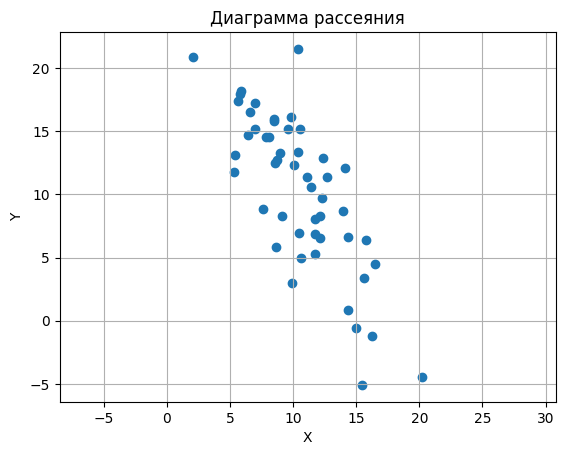

In [5]:
# строю диаграмму рассеяния
plt.scatter(X, Y)
plt.title("Диаграмма рассеяния")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)

# считаю выборочную корреляцию
cov_matrix = np.cov(sample, rowvar=False)
std_x, std_y = np.sqrt(cov_matrix[0][0]), np.sqrt(cov_matrix[1][1])
cor_pearson = cov_matrix[0][1] / (std_x * std_y)
print(f"Коэффициент корреляции Пирсона: {cor_pearson}")
print()

# проверяю критерий о значении коэффициента корреляции
test_data = cor_test(0, cor_pearson, sample_size)
print("Критерий для проверки гипотезы о значении коэффициента корреляции:")
print(f"Значение статистики: {test_data[0]}")
print(f"Значение p: {test_data[1]}")

P значение достаточно мало, чтобы мы могли сказать, что мы отвергаем нулевую гипотезу в угоду левосторонней альтернативы. То есть имеется обратная корреляционная зависимость, что мы и можем наблюдать на диаграмме.

Теперь составим уравнения регрессии. Они будут иметь следующий вид:

$$
\begin{gather*}
    M[Y|x] = \rho_{X,\, Y} \frac{\sigma_Y}{\sigma_X} (x - m_X) + m_Y \\
    M[X|y] = \rho_{X,\, Y} \frac{\sigma_X}{\sigma_Y} (y - m_Y) + m_X
\end{gather*}
$$

Где моменты и корреляция будут выборочными.

M[Y|x] = -1.3316299440319312x + 24.294920544536765
M[X|y] = -0.45200241038831457y + 15.159980069422474


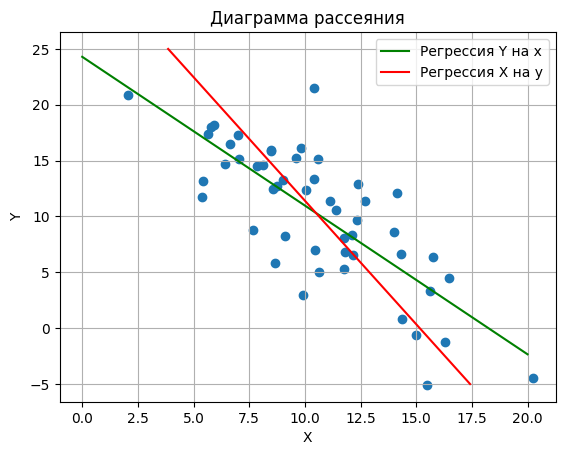

In [6]:
# выборочные характеристики
X_mean = X.mean()
Y_mean = Y.mean()
X_std = X.std(ddof=1)
Y_std = Y.std(ddof=1)
cov_matrix = np.cov([X, Y])
XY_cor = cov_matrix[0][1] / (X_std * Y_std)

# регрессия Y на x
coef_1_1 = XY_cor * Y_std / X_std
coef_1_2 = Y_mean - coef_1_1 * X_mean
print(f"M[Y|x] = {coef_1_1}x + {coef_1_2}")
Y_ = lambda x: coef_1_1 * x + coef_1_2

# регрессия X на y
coef_2_1 = XY_cor * X_std / Y_std
coef_2_2 = X_mean - coef_2_1 * Y_mean
print(f"M[X|y] = {coef_2_1}y + {coef_2_2}")
X_ = lambda y: coef_2_1 * y + coef_2_2

# визуализация
x = np.linspace(0, 20, 100)
y = np.linspace(-5, 25, 100)
plt.figure()
plt.plot(x, Y_(x), color="g", label="Регрессия Y на x")
plt.plot(X_(y), y, color="r", label="Регрессия X на y")
plt.scatter(X, Y)
plt.title("Диаграмма рассеяния")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)

Проверим правильность полученных уравнений с помощью встроенных функций:

In [7]:
# проверка параметров регрессии
res = sts.linregress(X, Y)
print(f"M[Y|x] = {res.slope}x + {res.intercept}")

res = sts.linregress(Y, X)
print(f"M[X|y] = {res.slope}y + {res.intercept}")

M[Y|x] = -1.331629944031931x + 24.294920544536758
M[X|y] = -0.4520024103883147y + 15.159980069422474


Значения не сильно расходятся, так что можно сказать, что все посчитано верно.

### Задание 2
В предположении, что ошибки наблюдений не коррелированы и имеют нормальное распределение $N(0,\, \sigma)$, оцените качество аппроксимации результатов наблюдения уравнением линейной регрессии $Y$ на $x$:
- Вычислите оценку $s^2$ для дисперсии ошибок наблюдений $\sigma^2$;
- Найдите коэффициент детерминации $R^2$;
- Постройте доверительные интервалы для параметров регрессии;
- Постройте доверительный интервал для дисперсии ошибок наблюдений $\sigma^2$;
- Постройте доверительные интервалы для среднего значения $Y$ при $x = x_0$ и визуализируйте их (на рисунок с диаграммой рассеивания и регрессионными прямыми нанесите графики зависимости левой и правой границ доверительных интервалов от значения $x = x_0$).
- Проверьте статистическую значимость линейной регрессии $Y$ на $x$ на уровне значимости 0.05.

Все расчеты пп. 1 – 6 выполните с непосредственным использованием формул.

Будем использовать следующее уравнение в качестве вероятностной модели:
$$Y = ax + b + E,$$
где $E \sim N(0,\, \sigma)$ - случайная ошибка

Коэффициент детерминации - это квадрат коэффициента корреляции, однако можно вывести связь этой велчины с регрессией в виде следующей формулы:
$$R^2 = \frac{\sum_i \hat{Y_i} - \overline{Y}}{\sum_i Y_i - \overline{Y}},$$
где $Y_i$ - наблюдаемые значения $Y$, $\hat{Y_i} = aX_i + b$ - предсказываемые значения $Y$, $\overline{Y}$ - выборочное среднее.

Параметры будем искать соответствующе (это выборочные):
$$\hat{a} = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y})}{\sum_i (x_i - \overline{x})^2}$$
$$\hat{b} = \overline{y} - a\overline{x}$$

Их доверительные интервалы имеют вид:
$$\hat{a} - t_{1 - \alpha/2}(n - 2) s\sqrt{\frac{1}{Q_x}}< a < \hat{a} + t_{1 - \alpha/2}(n - 2) s\sqrt{\frac{1}{Q_x}}$$
$$\hat{b} - t_{1 - \alpha/2}(n - 2) s\sqrt{\frac{\sum_i x_i^2}{nQ_x}}< b < \hat{b} + t_{1 - \alpha/2}(n - 2) s\sqrt{\frac{\sum_i x_i^2}{nQ_x}}$$

Доверительный интервал для дисперсии ошибок:
$$\frac{(n - 2)s^2}{\chi^2_{1-\alpha/2}(n - 2)} < \sigma^2 < \frac{(n - 2)s^2}{\chi^2_{\alpha/2}(n - 2)}$$

Доверительный интервал для среднего $Y$ при $x = x_0$:
$$\hat{y_0} - t_{1 - \alpha/2}(n - 2) s \sqrt{\frac{1}{n} + \frac{(x_0 - \overline{x})^2}{Q_x}} < M[Y] < \hat{y_0} + t_{1 - \alpha/2}(n - 2) s \sqrt{\frac{1}{n} + \frac{(x_0 - \overline{x})^2}{Q_x}}$$

Везде $Q_x = \sum_i (x_i - \overline{x})^2$

In [8]:
# интервал для параметра a
def a_interval(a, alpha, Q_x, ss, sample_size):
    tmp = sts.t(df=sample_size - 2).ppf(1 - alpha/2) * np.sqrt(ss / Q_x)
    return (a - tmp, a + tmp)

# интервал для параметра b
def b_interval(b, alpha, Q_x, ss, X, sample_size):
    tmp = sts.t(df=sample_size - 2).ppf(1 - alpha/2) * np.sqrt(ss *\
        sum([X[i]**2 for i in range(sample_size)])/ (sample_size * Q_x))
    return (b - tmp, b + tmp)

# интервал для дисперсии ошибок
def err_var_interval(alpha, ss, sample_size):
    tmp = (sample_size - 2) * ss
    distr = sts.chi2(df=sample_size - 2)
    return (tmp / distr.ppf(1 - alpha/2), tmp / distr.ppf(alpha/2))

# интервал для среднего Y при x = x_0
def mean_interval(y, x_0, x_mean, alpha, Q_x, ss, sample_size):
    tmp = sts.t(df=sample_size - 2).ppf(1 - alpha/2) *\
        np.sqrt(ss * (1/sample_size + (x_0 - x_mean)**2/Q_x))
    return (y - tmp, y + tmp)

Мы получиили следующее уравнение линейной регресии:
M[Y|x] = -1.3316299440319312x + 24.294920544536765

Оценка для дисперсии ошибок: 14.834603904217877
Коэффициент детерминации: 0.6018999444476895
Интервал для a: (-1.6459195992273492, -1.0173402888365133)
Интервал для b: (20.811788967783986, 27.778052121289544)
Интервал для дисперсии ошибок наблюдения: (10.746195418861637, 24.117773253134736)


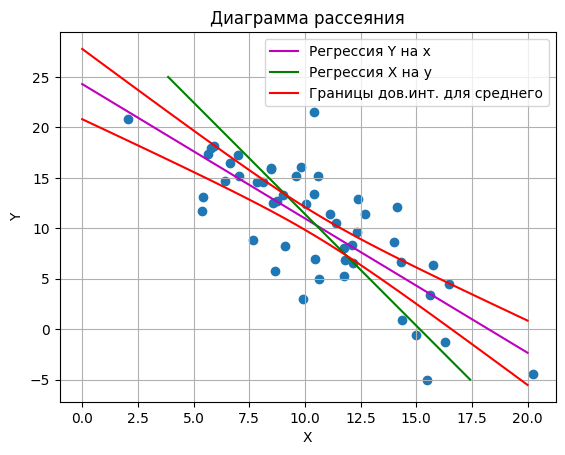

In [9]:
# вспомогательная переменная
Q_x = sum([(X[i] - X.mean())**2 for i in range(sample_size)])

# параметры регрессии
a = sum([(X[i] - X.mean())*(Y[i] - Y.mean()) for i in range(sample_size)]) / Q_x
b = Y.mean() - a * X.mean()

# функция регрессии
Y_ = lambda x: a * x + b
print("Мы получиили следующее уравнение линейной регресии:\n",
     f"M[Y|x] = {a}x + {b}\n", sep="")

# лист остатков/ошибок
error_sample = []
for i in range(sample_size):
    error_sample.append(Y[i] - Y_(X[i]))

# вспомогательная переменная
ss = sum([i**2 for i in error_sample]) / (sample_size - 2)

# оценка дисперсии остатков
error_var = sum([i**2 for i in error_sample]) / sample_size
print(f"Оценка для дисперсии ошибок: {error_var}")

# расчет коэффициента детерменации
det_coef = sum([(Y_(X[i]) - Y.mean())**2 for i in range(sample_size)]) / \
            sum((i - Y.mean())**2 for i in Y)
print(f"Коэффициент детерминации: {det_coef}")

# уровень значимости
alpha = 0.05

# интервальные оценки
interval_for_a = a_interval(a, alpha, Q_x, ss, sample_size)
print(f"Интервал для a: ({interval_for_a[0]}, {interval_for_a[1]})")

interval_for_b = b_interval(b, alpha, Q_x, ss, X, sample_size)
print(f"Интервал для b: ({interval_for_b[0]}, {interval_for_b[1]})")

interval_for_err_var = err_var_interval(alpha, ss, sample_size)
print(f"Интервал для дисперсии ошибок наблюдения: ({interval_for_err_var[0]},",
      f"{interval_for_err_var[1]})")

# визуализация для интервала для среднего
x = np.linspace(0, 20, 100)
y = np.linspace(-5, 25, 100)
plt.figure()
plt.plot(x, Y_(x), color="m", label="Регрессия Y на x")
plt.plot(X_(y), y, color="g", label="Регрессия X на y")
plt.scatter(X, Y)
plt.title("Диаграмма рассеяния")
plt.xlabel("X")
plt.ylabel("Y")

lower_bound = []
upper_bound = []
for i in x:
    interval_for_mean = mean_interval(Y_(i), i, X.mean(), alpha, Q_x, ss, sample_size)
    lower_bound.append(interval_for_mean[0])
    upper_bound.append(interval_for_mean[1])

plt.plot(x, lower_bound, color="r", label="Границы дов.инт. для среднего")
plt.plot(x, upper_bound, color="r")

plt.legend()
plt.grid(True)

### Задание 3
Для изучения вопроса об адекватности построенной модели проанализируйте остатки (выборку значений случайных ошибок
наблюдений – разностей между наблюдаемыми значениями $y_i$ и вычисленными по регрессионному уравнению $\tilde{y_i},\ i = 1,\, 2,\, ...,\, n)$. Постройте график зависимости остатков от $x_j$, постройте гистограмму выборки значений случайных ошибок наблюдений, проверьте гипотезу о распределении ошибок наблюдений по нормальному закону.

Замечание. При проведении регрессионного анализа считают, что случайные ошибки наблюдений имеют нулевое математическое ожидание, одинаковую дисперсию, попарно некоррелированы и распределены по нормальному закону (и, следовательно, являются независимыми случайными величинами). Подтверждение перечисленных свойств остатков говорит в пользу правильности построенной модели.

p-значение по Шапиро: 0.39677825570106506


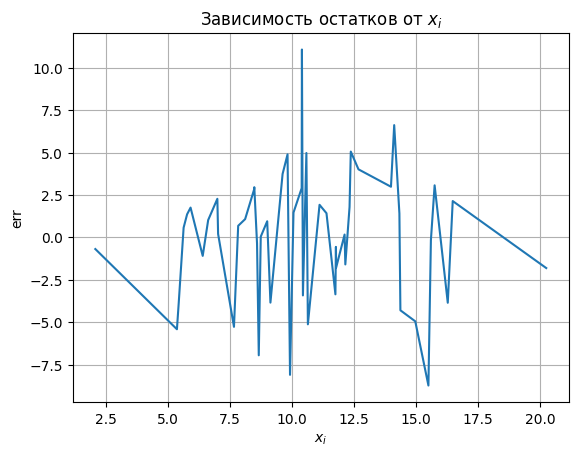

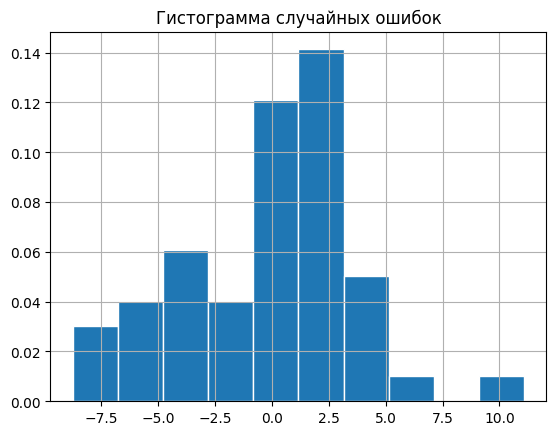

In [10]:
# график зависимости ошибок от x
sorted_errors = [x for _, x in sorted(zip(X, error_sample))]
plt.plot(sorted(X), sorted_errors)
plt.title("Зависимость остатков от $x_i$")
plt.xlabel("$x_i$")
plt.ylabel("err")
plt.grid(True)

# строю гистограмму
plt.figure()
plt.hist(error_sample, edgecolor='w', density=True)
plt.title(f"Гистограмма случайных ошибок")
plt.grid(True)

# критерий Шапиро-Уилка
shapiro_results = sts.shapiro(error_sample)

# выводим p-значения на экран
print(f"p-значение по Шапиро: {shapiro_results.pvalue}")

p-значение получилось достаточно большим, чтобы мы могли с уверенностью заявить о нормальности выборки случайных ошибок.

### Задание 4
Сгруппируйте данные по $x$ и проверьте адекватность линейной регрессии $Y$ на $x$ на уровне значимости 0.05.

Интервалы группировки по x:
(2.06, 5.9]
(5.9, 7.01]
(7.01, 8.47]
(8.47, 8.99]
(8.99, 10.05]
(10.05, 10.57]
(10.57, 11.76]
(11.76, 12.31]
(12.31, 14.32]
(14.32, 20.25]

Выборочное значение статистики: 1.4666293122234675
Квантиль F порядка 0.95: 2.1801704532006396

Линейная регрессия адекватна!


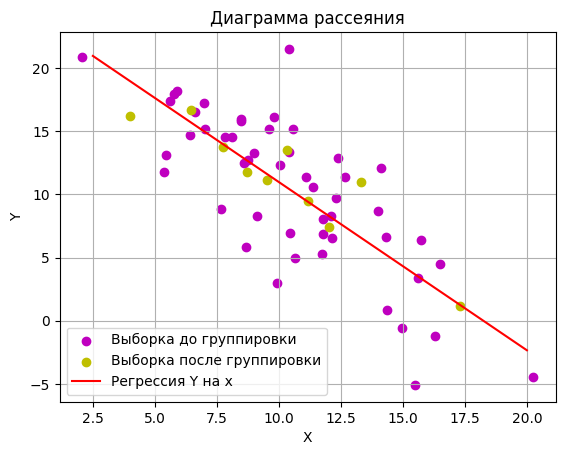

In [11]:
# уровень значимости
alpha = 0.05

# количество интервалов
num_of_intervals = 10

# вычисляю интервалы группировки по x (примерно равномерно)
set_X = sorted(list(set(X)))
step = len(set_X) / (num_of_intervals + 1)
x_intervals = []
for i in range(num_of_intervals):
    x_intervals.append(set_X[round(i * step)] - 0.01)
x_intervals.append(set_X[-1])

# вывожу полученные интервалы на экран
print("Интервалы группировки по x:")
for i in range(num_of_intervals):
    print(f"({x_intervals[i]}, {x_intervals[i + 1]}]")
print()

# получаю новую выборку (x - середины соотвествтующих интервалов,
# y - среднее всех y, попавших в соотвествующий интервал по x)
new_X = []
for i in range(num_of_intervals):
    new_X.append(round((x_intervals[i] + x_intervals[i + 1]) / 2, 4))

new_Y = []
Y_in_intervals = []
for i in range(num_of_intervals):
    Y_in_intervals.append([])
    for j in range(len(Y)):
        if x_intervals[i] < X[j] <= x_intervals[i + 1]:
            Y_in_intervals[i].append(Y[j])
    new_Y.append(np.mean(Y_in_intervals[i]))

# считаю регрессионные значения Y по новым x
regr_new_Y = [Y_(x) for x in new_X]

# мера неадекватности модели
Q_n = 0
for i in range(num_of_intervals):
    Q_n += len(Y_in_intervals[i]) * (new_Y[i] - regr_new_Y[i])**2

# сумма квадратов чистой ошибки
Q_p = 0
for i in range(num_of_intervals):
    for j in range(len(Y_in_intervals[i])):
        Q_p += (Y_in_intervals[i][j] - new_Y[i]) ** 2

# статистика (квантиль)
F = sts.f(num_of_intervals - 2, sample_size - num_of_intervals).ppf(1 - alpha)

# выборочное значение 
ssv = Q_n / Q_p * (sample_size - num_of_intervals) / (num_of_intervals - 2)

# вывожу результаты на экран
print(f"Выборочное значение статистики: {ssv}")
print(f"Квантиль F порядка {1 - alpha}: {F}")
print()

# проверяю гипотезу об адекватности
if ssv < F:
    print("Линейная регрессия адекватна!")
else:
    print("Линейная регрессия не очень адекватна =(")

# визуализирую диаграмму рассеяния для наглядности
x = np.linspace(2.5, 20, 100)
plt.scatter(X, Y, color='m', label="Выборка до группировки")
plt.scatter(new_X, new_Y, color='y', label="Выборка после группировки")
plt.plot(x, Y_(x), color="r", label="Регрессия Y на x")
plt.title("Диаграмма рассеяния")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)